<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/mikyAsianAmericanRestaurantSentiment_primoEsperimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Random'

# file con i dati di tutti i ristoranti random
all_analysis = '1n9vdCnppJGdE6M6HdKYlksuTntQYHA7P'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': all_analysis})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

# leggo il csv con pandas
res = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')


In [2]:
asian = res['ethnicity'] == 'asian'
mexican = res['ethnicity'] == 'hispanic, latino, or spanish origin'
black_american = res['ethnicity'] == 'black or african american'
white_american = res['ethnicity'] == 'white'
positive = res['review_sentiment'] == 'positive'
negative = res['review_sentiment'] == 'negative'
neutral = res['review_sentiment'] == 'neutral'

# TUPELO HONEY

restaurant = 'TupeloHoney'
totaleTupelo = len(res[(res['restaurant'] == '%s' % restaurant)])

# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
asianTupelo_positive = (len(res[(res['restaurant'] == '%s' % restaurant) & (asian) & (positive)]) * 100) / totaleTupelo


# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
asianTupelo_negative = (len(res[(res['restaurant'] == '%s' % restaurant) & (asian) & (negative)]) * 100) / totaleTupelo


# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
asianTupelo_neutral = (len(res[(res['restaurant'] == '%s' % restaurant) & (asian) & (neutral)]) * 100) / totaleTupelo

# CRAVINGS BUFFET

restaurant = 'CravingsBuffet'
totaleCravings = len(res[(res['restaurant'] == '%s' % restaurant)])

# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
asianCravings_positive = (len(res[(res['restaurant'] == '%s' % restaurant) & (asian) & (positive)]) * 100) / totaleCravings

# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
asianCravings_negative = (len(res[(res['restaurant'] == '%s' % restaurant) & (asian) & (negative)]) * 100) / totaleCravings

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
asianCravings_neutral = (len(res[(res['restaurant'] == '%s' % restaurant) & (asian) & (neutral)]) * 100) / totaleCravings



# CULINARY DROPOUT

restaurant = 'CulinaryDropout'
totaleCulinary = len(res[(res['restaurant'] == '%s' % restaurant)])

# POSITIVI
# numero medio di utenti asiatici, messicani e americani sul totale
asianCulinary_positive = (len(res[(res['restaurant'] == '%s' % restaurant) & (asian) & (positive)]) * 100) / totaleCulinary

# NEGATIVI
# numero medio di utenti asiatici, messicani e americani sul totale
asianCulinary_negative = (len(res[(res['restaurant'] == '%s' % restaurant) & (asian) & (negative)]) * 100) / totaleCulinary

# NEUTRI
# numero medio di utenti asiatici, messicani e americani sul totale
asianCulinary_neutral = (len(res[(res['restaurant'] == '%s' % restaurant) & (asian) & (neutral)]) * 100) / totaleCulinary

asian_american_positive = (asianTupelo_positive + asianCravings_positive + asianCulinary_positive) / 3
asian_american_negative = (asianTupelo_negative + asianCravings_negative + asianCulinary_negative) / 3
asian_american_neutral = (asianTupelo_neutral + asianCravings_neutral + asianCulinary_neutral) / 3
 

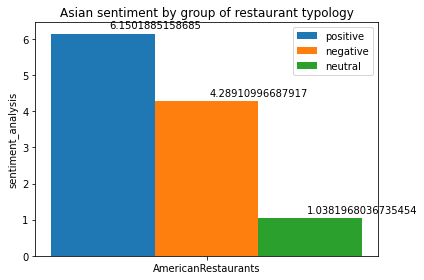

In [3]:
# Costruisco il grafico

labels = ['AmericanRestaurants']

# GRAFICO PER ASIATICI

asianPositive = [asian_american_positive]
asianNegative = [asian_american_negative]
asianNeutral = [asian_american_neutral]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, asianPositive, width, label='positive')
rects2 = ax.bar(x, asianNegative, width, label='negative')
rects3 = ax.bar(x + width, asianNeutral, width, label='neutral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('sentiment_analysis')
ax.set_title('Asian sentiment by group of restaurant typology')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()